In [15]:
#This is a script that will show the data provided by Frankie wilson on the number of people entering the libraries
#There are 4 data sets: RADCAMTermTimeFinal, OLDBODTermTime, RADCAMvacationFinal, OLDBODvacation
import os
import xlrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
import seaborn as sns
from scipy.optimize import curve_fit

In [16]:
#import the library occupancy data
df = pd.read_csv("C:\\Users\\Student\\Documents\\3YP\\Building efficiency\\zoningdata\\RADCAMvacationFinal.csv",)

df['DateTime'] = pd.to_datetime(df[['Day','Month','Year','Hour']],format='%d/%m/%Y %H')#ensure datetime is enabled
df.set_index('DateTime') #set the dates as the index


Year  Month  Day  Hour  Count
DateTime                                          
2018-08-01 18:00:00  2018      8    1    18      6
2018-08-01 17:00:00  2018      8    1    17     32
2018-08-01 16:00:00  2018      8    1    16     35
2018-08-01 15:00:00  2018      8    1    15     46
2018-08-01 14:00:00  2018      8    1    14     58
...                   ...    ...  ...   ...    ...
2019-07-31 12:00:00  2019      7   31    12     35
2019-07-31 11:00:00  2019      7   31    11     35
2019-07-31 10:00:00  2019      7   31    10     36
2019-07-31 09:00:00  2019      7   31     9     43
2019-07-31 08:00:00  2019      7   31     8      1

[1680 rows x 5 columns]

In [17]:
#add columns with different date information
df['Month'] = df['DateTime'].dt.month_name()
df['Day'] = df['DateTime'].dt.day_name()
df['Date']=df['DateTime'].dt.date
df['Hour']=df['DateTime'].dt.hour
del df["DateTime"]
del df["Year"]

#df1=df.loc[(df['Hour']>7.9)]
#df2=df1.loc[(df1['Hour'])<21.1]
#df3 = df2.groupby(['Day', 'Hour'],sort=False).agg('mean')
#print(df1)
#df3.to_csv('Averagehourlycounts')

df1=df.groupby(['Day', 'Hour']).mean()
print(df1)
df1.to_csv('AverageHourlyCountsRADCAMvacationFinal')
#df1.to_excel('AverageHourlyCounts')

                    Count
Day       Hour           
Friday    6      1.000000
          7      2.000000
          8      2.565217
          9     52.769231
          10    47.692308
...                   ...
Wednesday 15    59.785714
          16    56.821429
          17    38.500000
          18    14.107143
          20     4.000000

[83 rows x 1 columns]


Text(0.5, 1.0, 'Readers Entering during Vacation')

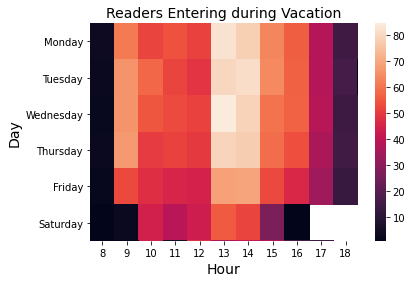

In [18]:
heatmap = pd.pivot_table(df1, values='Count', index=['Day'], columns='Hour')

a = heatmap.index.values

#To order days of the week
rows = list(a)
rows.insert(0, rows.pop(rows.index('Monday')))
rows.insert(1, rows.pop(rows.index('Tuesday')))
rows.insert(2, rows.pop(rows.index('Wednesday')))
rows.insert(3, rows.pop(rows.index('Thursday')))
rows.insert(4, rows.pop(rows.index('Friday')))
rows.insert(5, rows.pop(rows.index('Saturday')))
heatmap = heatmap.loc[rows, :]

sns.heatmap(heatmap)
plt.xlim([2,13])
plt.ylim([6,0])
plt.xlabel("Hour", size=14)
plt.ylabel("Day", size=14)
plt.title("Readers Entering during Vacation", size=14)